<a href="https://colab.research.google.com/github/kristofertsai/Bruin-Sports-Analytics/blob/main/BSA_Fall_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


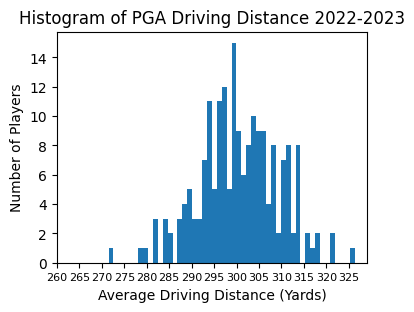

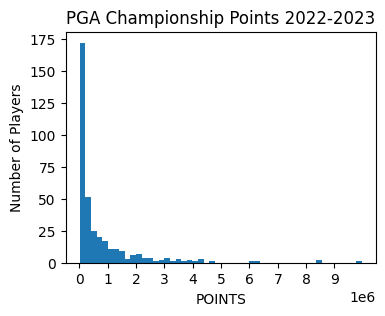

The median is Q2: 711949.5


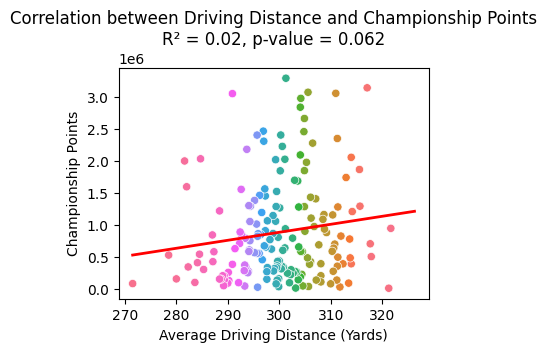

Slope: 12469.054867607581
Intercept: -2851607.6391414204
R-squared: 0.019752746150995846
p-value: 0.06206286810014911
Standard error: 6640.007769266698
  Distance_Range        POINTS
0     (260, 270]           NaN
1     (270, 280]  2.609220e+05
2     (280, 290]  6.043354e+05
3     (290, 300]  1.175350e+06
4     (300, 310]  1.365017e+06
5     (310, 320]  1.422785e+06
6     (320, 330]  3.167636e+06


<ipython-input-6-fcf97a6baa3b>:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_points_per_range = merged_df.groupby('Distance_Range')['POINTS'].mean().reset_index()


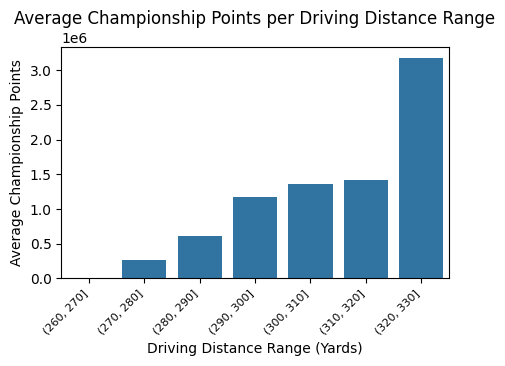

             PLAYER    AVG   POINTS
0      Rory McIlroy  326.3  8536500
2  Brandon Matthews  321.3    15762
             PLAYER     AVG     POINTS
0      Rory McIlroy  326.30  8536500.0
1  Brandon Matthews  321.30    15762.0
2       Tour Median  300.05   711949.5


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

df1 = pd.read_csv('/content/drive/My Drive/BSA & Datalearn Fall 2024 Data/PGA Driving Distance 2022-2023.csv')
df2 = pd.read_csv('/content/drive/My Drive/BSA & Datalearn Fall 2024 Data/PGA Championship Points 2022-2023.csv')

# --- Visualizations for PGA Driving Distance 2022-2023 ---
plt.figure(figsize=(4, 3))
plt.hist(df1['AVG'], bins=50)
plt.xlabel('Average Driving Distance (Yards)')
plt.ylabel('Number of Players')
plt.title('Histogram of PGA Driving Distance 2022-2023')
plt.xticks(range(260, 330, 5), fontsize=8)
plt.show()

# --- Visualizations for PGA Championship Points 2022-2023 ---
plt.figure(figsize=(4, 3))
plt.hist(df2['POINTS'], bins=50)
plt.xlabel('POINTS')
plt.ylabel('Number of Players')
plt.title('PGA Championship Points 2022-2023')
plt.xticks(range(0, 10000000, 1000000))
plt.show()

merged_df = pd.merge(df1[['PLAYER_ID', 'PLAYER', 'AVG']],  # df1 is average driving distance
                     df2[['PLAYER_ID', 'POINTS']],        # df2 is championship points
                     on='PLAYER_ID')

'''
Method 1: Linear Regression
'''
from scipy.stats import linregress
import numpy as np

# Setting IQR
Q1 = merged_df['POINTS'].quantile(0.25)
Q3 = merged_df['POINTS'].quantile(0.75)
Q2 = merged_df['POINTS'].quantile(0.50)
print("The median is Q2:", Q2)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = merged_df[(merged_df['POINTS'] >= lower_bound) & (merged_df['POINTS'] <= upper_bound)]

# Perform linear regression on filtered data
slope, intercept, r_value, p_value, std_err = linregress(filtered_df['AVG'], filtered_df['POINTS'])


# merged_df['LOG_POINTS'] = np.log(merged_df['POINTS'] + 1)  # Add 1 to avoid log(0)
# slope, intercept, r_value, p_value, std_err = linregress(merged_df['AVG'], merged_df['LOG_POINTS'])
# slope, intercept, r_value, p_value, std_err = linregress(merged_df['AVG'], merged_df['POINTS'])

#Data Presentation (Scatterplot & Rergression line)
plt.figure(figsize=(4, 3))
sns.scatterplot(data=filtered_df, x='AVG', y='POINTS', hue='PLAYER', legend=False)
plt.plot(merged_df['AVG'], intercept + slope * merged_df['AVG'], color='red', linewidth=2)
plt.xlabel("Average Driving Distance (Yards)")
plt.ylabel("Championship Points")
plt.title(f"Correlation between Driving Distance and Championship Points\n"
          f"R² = {r_value**2:.2f}, p-value = {p_value:.3f}")
plt.show()

#Regression results
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("p-value:", p_value)
print("Standard error:", std_err)

'''
Method 2: Bin Analysis
'''
# Breakdown into ranges
merged_df['Distance_Range'] = pd.cut(merged_df['AVG'], bins=[260, 270, 280, 290, 300, 310, 320, 330])

# Calculate avg championship points for each range
avg_points_per_range = merged_df.groupby('Distance_Range')['POINTS'].mean().reset_index()
print(avg_points_per_range)
# Plot the results
plt.figure(figsize=(5, 3))
sns.barplot(x='Distance_Range', y='POINTS', data=avg_points_per_range)
plt.xlabel("Driving Distance Range (Yards)")
plt.ylabel("Average Championship Points")
plt.title("Average Championship Points per Driving Distance Range")
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate labels 45 degrees, smaller font size
#plt.tight_layout()  # Adjust layout to fit labels properly
plt.show()

# Filter the merged dataframe for McIlroy and Matthews
mcilroy_matthews_df = merged_df[merged_df['PLAYER'].isin(['Rory McIlroy', 'Brandon Matthews'])]

# Print the filtered dataframe
print(mcilroy_matthews_df[['PLAYER', 'AVG', 'POINTS']])

# ... (your existing code) ...

# Calculate tour median for driving distance and points
tour_median_avg = merged_df['AVG'].median()
tour_median_points = merged_df['POINTS'].median()

# Create a new DataFrame for the tour median row
tour_median_df = pd.DataFrame({
    'PLAYER': ['Tour Median'],
    'AVG': [tour_median_avg],
    'POINTS': [tour_median_points]
})

# Concatenate the tour median row to the filtered DataFrame
mcilroy_matthews_df = pd.concat([mcilroy_matthews_df, tour_median_df], ignore_index=True)

# Print the updated DataFrame
print(mcilroy_matthews_df[['PLAYER', 'AVG', 'POINTS']])

In [ ]:
print(merged_df)

     PLAYER_ID            PLAYER    AVG   POINTS Distance_Range
0        28237      Rory McIlroy  326.3  8536500     (320, 330]
1        58696       Peter Kuest  321.7   950647     (320, 330]
2        51491  Brandon Matthews  321.3    15762     (320, 330]
3        52372     Cameron Champ  317.9   509631     (310, 320]
4        52453  Nicolai Hojgaard  317.7   709605     (310, 320]
..         ...               ...    ...      ...            ...
187      30927      Brendon Todd  282.0  1600101     (280, 290]
188      40058         Zac Blair  281.6  2002652     (280, 290]
189      31202    William McGirt  280.0   161483     (270, 280]
190      34409   David Lingmerth  278.5   533113     (270, 280]
191      31560      Brian Stuard  271.5    88170     (270, 280]

[192 rows x 5 columns]
